In [ ]:
import pandas as pd
import re
import numpy as np
from collections import Counter
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import *
from nltk.tokenize import sent_tokenize, word_tokenize
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
nltk.download('punkt') 
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from numpy import asarray
from numpy import array
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/datasets/tinder_google_play_reviews.csv')

In [ ]:
df1.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOElIsyH7v-Hhhzu6PuI9DIsN7VUcxx0h5SBKpK...,Nikhilesh Verma,https://play-lh.googleusercontent.com/a-/AOh14...,Fake app,1,0,NaN,2022-04-09 11:15:07,NaN,NaN
1,gp:AOqpTOH0smXMRH_GMXoPk0F6hUbPoaQ6e6a29shjEfS...,Tristan Jones,https://play-lh.googleusercontent.com/a/AATXAJ...,"I'm not a racist person, l respect all races b...",2,0,13.5.0,2022-04-09 11:03:58,NaN,NaN
2,gp:AOqpTOFKzNUWcq_qhxzt2Pv8FsukbMOar4kE8f9m2yD...,Lola Racheal,https://play-lh.googleusercontent.com/a/AATXAJ...,I was banned from using the app i don't know w...,1,0,13.5.0,2022-04-09 11:00:09,NaN,NaN
3,gp:AOqpTOF9FSIUVm7b_o1_SJ1p4zi-WpTxBbToccDf5bN...,Boakiller,https://play-lh.googleusercontent.com/a-/AOh14...,Ive been matching with people but they never s...,1,0,13.5.0,2022-04-09 10:54:40,NaN,NaN
4,gp:AOqpTOE9BAQpxA1lZJpmnzmJIaRPxAkhJrXBHA-cF1b...,Maddison Macfarlane,https://play-lh.googleusercontent.com/a-/AOh14...,"Got banned, don't know why or how? There isn't...",1,0,NaN,2022-04-09 10:46:22,NaN,NaN


In [ ]:
df1['at'] = pd.to_datetime(df1['at'], utc=True)

df1['date'] = df1['at'].apply(lambda r:r.date)
df1['year'] = df1['at'].apply(lambda r:r.year)


df1.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,date,year
0,gp:AOqpTOElIsyH7v-Hhhzu6PuI9DIsN7VUcxx0h5SBKpK...,Nikhilesh Verma,https://play-lh.googleusercontent.com/a-/AOh14...,Fake app,1,0,NaN,2022-04-09 11:15:07+00:00,NaN,NaN,2022-04-09,2022
1,gp:AOqpTOH0smXMRH_GMXoPk0F6hUbPoaQ6e6a29shjEfS...,Tristan Jones,https://play-lh.googleusercontent.com/a/AATXAJ...,"I'm not a racist person, l respect all races b...",2,0,13.5.0,2022-04-09 11:03:58+00:00,NaN,NaN,2022-04-09,2022
2,gp:AOqpTOFKzNUWcq_qhxzt2Pv8FsukbMOar4kE8f9m2yD...,Lola Racheal,https://play-lh.googleusercontent.com/a/AATXAJ...,I was banned from using the app i don't know w...,1,0,13.5.0,2022-04-09 11:00:09+00:00,NaN,NaN,2022-04-09,2022
3,gp:AOqpTOF9FSIUVm7b_o1_SJ1p4zi-WpTxBbToccDf5bN...,Boakiller,https://play-lh.googleusercontent.com/a-/AOh14...,Ive been matching with people but they never s...,1,0,13.5.0,2022-04-09 10:54:40+00:00,NaN,NaN,2022-04-09,2022
4,gp:AOqpTOE9BAQpxA1lZJpmnzmJIaRPxAkhJrXBHA-cF1b...,Maddison Macfarlane,https://play-lh.googleusercontent.com/a-/AOh14...,"Got banned, don't know why or how? There isn't...",1,0,NaN,2022-04-09 10:46:22+00:00,NaN,NaN,2022-04-09,2022


In [ ]:
dfr = df1.groupby(['score', 'year'], dropna=True, as_index=False).size().sort_values('year', ascending=False)
dfr = dfr[dfr['score']!=0]
dfr = dfr[dfr['score']!=2]
dfr = dfr[dfr['score']!=3]
dfr = dfr[dfr['score']!=4]
import plotly.express as px
fig = px.line(dfr, x='year', y='size', color='score', text='score')
fig.update_traces(textposition='top center')
fig.show()

In [ ]:
# started from 2020, the spread between best rating and worst rating becomes larger and the number of good review started to decrease, so we would like to dig in to 2020-2022

In [ ]:
df1 = df1[df1['year'] > 2019]

In [ ]:
df1 = df1[df1['content'].notna()]
df1.isnull().sum()

reviewId                     0
userName                     2
userImage                    0
content                      0
score                        0
thumbsUpCount                0
reviewCreatedVersion         0
at                           0
replyContent            107350
repliedAt               107350
date                         0
year                         0
versionshort                 0
dtype: int64

In [ ]:
#removing data without version

df1['reviewCreatedVersion'].fillna('0', inplace=True)
df1['versionshort'] = df1['reviewCreatedVersion'].apply(lambda x: x.split('.')[0])

df1 = df1[df1['versionshort']!= '0']
df1['versionshort'].value_counts()

11    54478
12    40867
13     7425
10     2697
8       870
9       833
7       476
6       411
4       269
5       215
3        45
2        29
1         8
Name: versionshort, dtype: int64

In [ ]:
# https://github.com/ibracru/Tinder-reviews-sentiment-analysis/blob/main/Analisis_K.ipynb
dfs = df1.groupby(['score', 'versionshort'], dropna=True, as_index=False).size()

fig = px.scatter(dfs, x='versionshort', y='score', size='size', color='score', title='App version vs Score review', size_max=30, opacity=0.7,
                 category_orders={'versionshort': [1,2,3,4,5,6,7,8,9,10,11,12,13]}, labels={'score':'Count'},
                 text='size').update_xaxes(title='Version').update_yaxes(title='Score')
fig.update_layout(legend_title_text='Size', uniformtext_minsize=3, uniformtext_mode='hide')
fig.update_traces(textposition='top center', textfont_size=10, textfont_color='grey')
fig.show()

In [ ]:
## one hot encoding, scores which greater and equal to 4 will be considered as positive review

In [ ]:
df1['label'] = df1.apply(lambda x: '1' if x['score']>3 else '0', axis=1)

In [ ]:
# train test 

In [ ]:
d1=df1[df1['label']=='1']

In [ ]:
text1=[x for x in d1['content']]

In [ ]:
len(text1)

42202

In [ ]:
d0=df1[df1['label']=='0']

In [ ]:
text0=[x for x in d0['content']]

In [ ]:
len(text0)

66421

In [ ]:
docs = text1 + text0

In [ ]:
# remove stopwords

In [ ]:
stopword = stopwords.words('english')

In [ ]:
texts_new = []
#words = []
for text in docs:
    text_new = []
    te = word_tokenize(str(text))
    for word in te:
        if word.lower() not in stopword:
            text_new.append(word)
            #words.append(text_new)
    texts_new.append(' '.join(text_new))
    

In [ ]:
import re
text = [str(t.lower()) for t in texts_new] 
text_new = []
for te in text:
    # Remove all puncuations
    new = re.sub(r"[^\w\s]", "",te)
    text_new.append(new)

In [ ]:
len(text_new)

108623

In [ ]:
# lemma

In [ ]:
lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


In [ ]:
newtext= [lemmatize_sentence(x) for x in text_new]

In [ ]:
labels = np.concatenate([np.ones(42202), np.zeros(66421)])

In [ ]:
# regex clean

In [ ]:
# review1=[]
# for x in text_new:
#     text1=re.sub(r"\b(bann(?:ed|ing)?|suspend(?:ed)?|b?lock(?:ed|ing)?)\b",x)
#     text2=re.sub(r"\b(bug(?:s|gy)?|crash(?:ed)?|servers?|algorithms?)\b",text1)
#     text3=re.sub(r"\b(regist(?:ration|er|ered)|log(?:ging|ged)?(?:-| )?in)\b",'_BROKEN_',text2)
#     text4=re.sub(r'\b((buy)|(bought)|(purchased?))\b','_BUY_',text3)
#     text5=re.sub(r'\b(birth(?:-|)day)|(birth(?:-|)(?:a|i)versary)|(b(?:-| )day)|(g(?:-| )day)|(d(?:-| )o(?:-| )b)|(born(?:-| )day)\b','_BIRTHDAY_',text4)
#     text6=re.sub(r'\b(christ(?:-|)mas)|(x(?:-|)mas)|(mythmas)|(christams)|(xxx(?:-|)mas)\b','_XMAS_',text5)
#     text7=re.sub(r'\b(worms?)|(disgusting)|(moldy)|(gross)\b','_FOOD_QUALITY_',text6)
#     text8=re.sub(r'\b(challenges?)|(challengings?)|(hard(?:est|er)|hard)|(efforts?)\b','_TIME_COMSUMING_',text7)
#     text9=re.sub(r'\b(inhalings?)|(inhales?)|(inhaled?)|(sallow)|(sallowed)\b','_INHALE_',text8)
#     text10=re.sub(r'\b(delicious|tasty|yummy|yum|wonderful|appetizing|savory)\b','_TASTY_',text9)
#     text11=re.sub(r'\b(dogs?)|(pups?)|(puppys?)|(doggies?)|(doggy)|(appetizing)|(savory)\b','_DOG_',text10)
#     review1.append(text11)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=5000, oov_token="UNKNOWN_TOKEN")
tokenizer.fit_on_texts(newtext)
MAX_SEQUENCE_LENGTH = 100

In [ ]:
def integer_encode_documents(docs, tokenizer):
    return tokenizer.texts_to_sequences(docs)

# integer encode the documents
encoded_docs = integer_encode_documents(newtext, tokenizer)
# this is a list of lists, the numbers represent the index position of that word.
# for instance, 33 means the 33rd word in the vocabulary
# Notice the last document has 4 numbers, since it is a 4 word document: Could have done better.
padded_docs = pad_sequences(encoded_docs, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
labels = to_categorical(encoder.fit_transform(labels))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_docs, labels, test_size=0.2,stratify=labels)

In [ ]:
# import Keras Toolkit

In [ ]:
from random import randint
from numpy import array, argmax, asarray, zeros
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding

In [ ]:
VOCAB_SIZE = int(len(tokenizer.word_index) * 1.1)

In [ ]:
# Load in Embeddings

In [ ]:
def load_glove_vectors():
    embeddings_index = {}
    with open('/content/drive/MyDrive/datasets/glove.6B.100d.txt') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    print('Loaded %s word vectors.' % len(embeddings_index))
    return embeddings_index


embeddings_index = load_glove_vectors()

Loaded 400000 word vectors.


In [ ]:
# create a weight matrix for words in training docs
embedding_matrix = zeros((VOCAB_SIZE, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: # check that it is an actual word that we have embeddings for
        embedding_matrix[i] = embedding_vector

In [ ]:
# Define in Model

In [ ]:
from keras.layers.recurrent import SimpleRNN, LSTM
from keras.layers import Flatten, Masking
# define model

def make_binary_classification_rnn_model(plot=False):
    model = Sequential()
    model.add(Embedding(VOCAB_SIZE, 100, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False))
    model.add(Masking(mask_value=0.0)) # masking layer, masks any words that don't have an embedding as 0s.
    model.add(SimpleRNN(units=64, input_shape=(1, MAX_SEQUENCE_LENGTH)))
    model.add(Dense(16))
    model.add(Dense(2, activation='softmax'))
    
    # Compile the model
    model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # summarize the model
    model.summary()
    
    if plot:
        plot_model(model, to_file='model.png', show_shapes=True)
    return model

def make_lstm_classification_model(plot=False):
    model = Sequential()
    model.add(Embedding(VOCAB_SIZE, 100, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False))
    model.add(Masking(mask_value=0.0)) # masking layer, masks any words that don't have an embedding as 0s.
    model.add(LSTM(units=32, input_shape=(1, MAX_SEQUENCE_LENGTH)))
    model.add(Dense(16))
    model.add(Dense(2, activation='softmax'))
    
    # Compile the model
    model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # summarize the model
    model.summary()
    
    if plot:
        plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [ ]:
# Compile Model

In [ ]:
model = make_lstm_classification_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          4322700   
                                                                 
 masking (Masking)           (None, 100, 100)          0         
                                                                 
 lstm (LSTM)                 (None, 32)                17024     
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 4,340,286
Trainable params: 17,586
Non-trainable params: 4,322,700
_________________________________________________________________


In [ ]:
# Fit the Model

In [ ]:
history = model.fit(X_train, y_train,validation_split = 0.1, epochs=5, verbose=1)

Epoch 1/5
2444/2444 [==============================] - 199s 80ms/step - loss: 0.3211 - accuracy: 0.8712 - val_loss: 0.2942 - val_accuracy: 0.8853
Epoch 2/5
2444/2444 [==============================] - 202s 83ms/step - loss: 0.2908 - accuracy: 0.8850 - val_loss: 0.2860 - val_accuracy: 0.8900
Epoch 3/5
2444/2444 [==============================] - 192s 79ms/step - loss: 0.2796 - accuracy: 0.8905 - val_loss: 0.2782 - val_accuracy: 0.8917
Epoch 4/5
2444/2444 [==============================] - 190s 78ms/step - loss: 0.2706 - accuracy: 0.8940 - val_loss: 0.2838 - val_accuracy: 0.8906
Epoch 5/5
2444/2444 [==============================] - 190s 78ms/step - loss: 0.2640 - accuracy: 0.8962 - val_loss: 0.2758 - val_accuracy: 0.8931


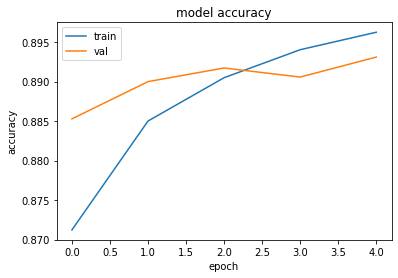

In [ ]:
import keras
from matplotlib import pyplot as plt

def plot_fit_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
plot_fit_history(history)

In [ ]:
# Evaluate the Model

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)

679/679 [==============================] - 18s 27ms/step - loss: 0.2900 - accuracy: 0.8875
